# Neural networks with varying number of nodes and layers



In [62]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from functions import softmax, sigmoid, sigmoid_der, softmax_der, accuracy, cross_entropy_der, cross_entropy, ReLU, ReLU_der
from functions import create_layers, feed_forward_batch, feed_forward_saver, backpropagation, backpropagation_cross, train_network

In [13]:
def train_network_cross(
    inputs, layers, activation_funcs, activation_ders, targets, learning_rate=0.001, epochs=100, momentum=0.3, minibatch_size=15
):
    change = [ (np.zeros_like(W), np.zeros_like(b)) for (W, b) in layers ]
    n_data = inputs.shape[0]
    m = int(n_data / minibatch_size)
    for i in range(epochs):
        indices = np.random.permutation(n_data)
        x_shuffled = inputs[indices]
        y_shuffled = targets[indices]
        for i in range(m):
            xi = x_shuffled[i : i + minibatch_size]
            yi = y_shuffled[i : i + minibatch_size]
            layer_grads = backpropagation_cross(xi, layers, activation_funcs, yi, activation_ders)
            for idx, ((W, b), (W_g, b_g), (W_c, b_c)) in enumerate(zip(layers, layer_grads, change)):
                new_change_W = learning_rate * W_g + momentum * W_c
                new_change_b = learning_rate * b_g + momentum * b_c
                W -= new_change_W
                b -= new_change_b
                layers[idx] = (W, b)
                change[idx] = (new_change_W, new_change_b)  

In [68]:

iris = datasets.load_iris()

inputs = iris.data

# np.random.seed(42)

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

network_input_size = 4

layer_no = [0, 1, 2, 3]
layer_sizes = [5, 10, 25, 30]

accuracies = np.zeros((4,4))

layer_output_sizes =  [3]
activation_funcs =  [softmax]
activation_ders = [softmax_der]
layers = create_layers(network_input_size, layer_output_sizes)

train_network_cross(inputs, layers, activation_funcs, activation_ders, targets, learning_rate=0.01, epochs=500, minibatch_size=15)
predictions = feed_forward_batch(inputs, layers, activation_funcs)

acc = accuracy(predictions, targets)
for k in range(len(layer_sizes)):
    accuracies[0,k] = acc


for i in range(1, len(layer_no)):
    for j in range(len(layer_sizes)):
        layer_output_sizes = [ layer_sizes[j] ] * layer_no[i] + [3]
        activation_funcs = [sigmoid] * layer_no[i]  + [softmax]
        activation_ders = [sigmoid_der] * layer_no[i] + [softmax_der]
        layers = create_layers(network_input_size, layer_output_sizes)

        train_network_cross(inputs, layers, activation_funcs, activation_ders, targets, learning_rate=0.01, epochs=500, minibatch_size=15)
        predictions = feed_forward_batch(inputs, layers, activation_funcs)

        acc = accuracy(predictions, targets)
        accuracies[i,j] = acc



In [66]:

accuracies

array([[0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333]])

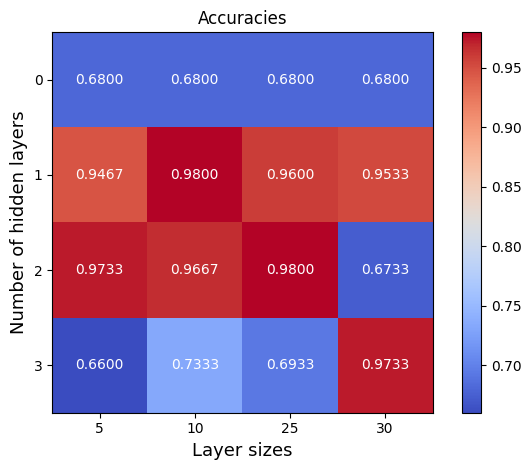

In [69]:
fig, ax = plt.subplots()
im = ax.imshow(accuracies, cmap='coolwarm')
ax.set_xticks(range(len(layer_sizes)), labels=layer_sizes)
ax.set_yticks(range(len(layer_no)), labels=layer_no)

for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        text = ax.text(j, i, "{:.4f}".format(accuracies[i,j]), ha='center', va='center', color='w')

# ax.set_title('MSE of cross validation')
ax.set_xlabel('Layer sizes', fontsize=13)
ax.set_ylabel('Number of hidden layers', fontsize=13)
ax.set_title('Accuracies')
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.savefig("../Figures/heatmap_accuracies_iris.png", dpi=300, bbox_inches='tight')
plt.show()

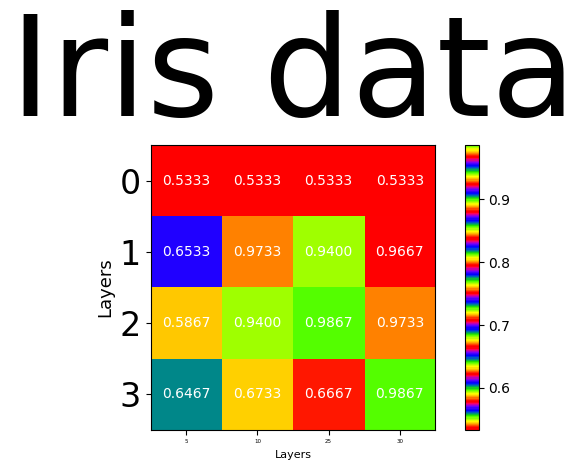

In [60]:
# bad fig
fig, ax = plt.subplots()
im = ax.imshow(accuracies, cmap='prism')
ax.set_xticks(range(len(layer_sizes)), labels=layer_sizes, fontsize=4)
ax.set_yticks(range(len(layer_no)), labels=layer_no, fontsize=24)

for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        text = ax.text(j, i, "{:.4f}".format(accuracies[i,j]), ha='center', va='center', color='w')

# ax.set_title('MSE of cross validation')
ax.set_xlabel('Layers', fontsize=8)
ax.set_ylabel('Layers', fontsize=13)
ax.set_title('Iris data', fontsize=100)
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.savefig("../Figures/heatmap_accuracies_iris_bad_fig.png", dpi=300, bbox_inches='tight')
plt.show()